## 1. Data Understanding
#### 1.1 Loading csv into DataFrame

In [705]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.core.display import HTML
warnings.filterwarnings('ignore')

# Objective: To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

## 1. Data Understanding

### 1.1 Loading csv into DataFrame

In [706]:
loan_df = pd.read_csv('loan.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### 1.2 Exploring data columns and rows

In [707]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [708]:
loan_df.shape

(39717, 111)

In [709]:
print(loan_df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### 1.2.1 Checking if duplicate records present in the dataset

In [710]:
dup = loan_df[loan_df.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### 1.2.2 Check for columns having missing values and unique values

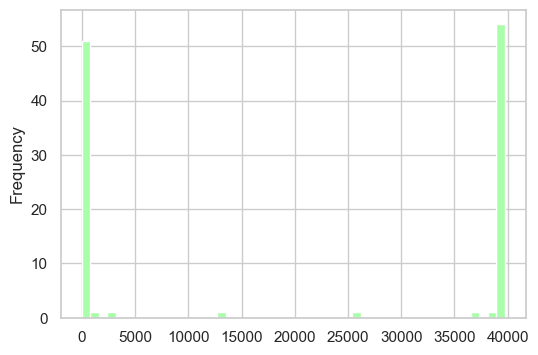

In [711]:
column_null_count = loan_df.isnull().sum()
column_null_count.plot(kind='hist', bins=50, figsize=(6, 4))
plt.show()

In [712]:
print(column_null_count)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


##### This above plot and data clearly shows that there are some columns which has full of null values as the length is 39717 and they are of no use and some columns have high null values.  But lets observe in terms of percentage

<Axes: ylabel='Frequency'>

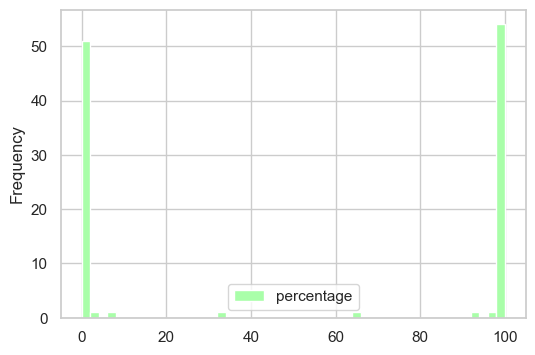

In [713]:
null_percentage = round(100*loan_df.isnull().mean(),2).reset_index(name='percentage')
null_percentage.plot(kind='hist', bins=50, figsize=(6, 4))



In [714]:
null_percentage

,index,percentage
0,id,0.0
1,member_id,0.0
2,loan_amnt,0.0
3,funded_amnt,0.0
4,funded_amnt_inv,0.0
...,...,...
106,tax_liens,0.1
107,tot_hi_cred_lim,100.0
108,total_bal_ex_mort,100.0
109,total_bc_limit,100.0


#### There are many columns having null values between 10 to 100 %, columns with more than 10k null values may not add value to problem so lets list out thoes columns

In [715]:
threshold_for_null_values = 10000
column_null_count.loc[(column_null_count.values > threshold_for_null_values) & (column_null_count.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

### 2. Data Cleaning and Manupulation

#### 2.1 Removing the null columns greater than the 10K as they may not provide meaning information

In [716]:
loan_df.drop(columns=list(column_null_count[column_null_count.values > 10000].index), inplace=True)
loan_df.shape

(39717, 53)

#### 2.2 Cleaning: Check for missing information or with unique or single values

In [717]:
unique_columns = loan_df.nunique()
print(unique_columns)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

Columns with one value would not be of any use in the analysis, so lets drop them

In [718]:
column_with_unique_values = unique_columns[unique_columns.values == 1]
column_with_unique_values

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [719]:
loan_df.drop(columns = list(column_with_unique_values.index), inplace=True)
loan_df.shape

(39717, 44)

#### 2.3 Following columns does not seems derive any infomration given the problem context, so removing them.

In [720]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_df.drop(columns=del_cols, inplace=True)
loan_df.shape

(39717, 28)

In [721]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


#### 3.0 Preparing Data

##### 3.1 Checking loan status column

In [722]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### "Current" doesnt give any info on our objective analysis for approving or rejecting application, so dropping these values

In [723]:
current_status ='Current'
loan_df = loan_df.query('loan_status != @current_status')
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

#### 3.2 Correcting the int_rate column values for evaaluation 

In [724]:
loan_df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [725]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

#### We can observe difference between the mean and the std, which indicates that there are ouliers in the values, lets look at the box plot for this column

<Axes: >

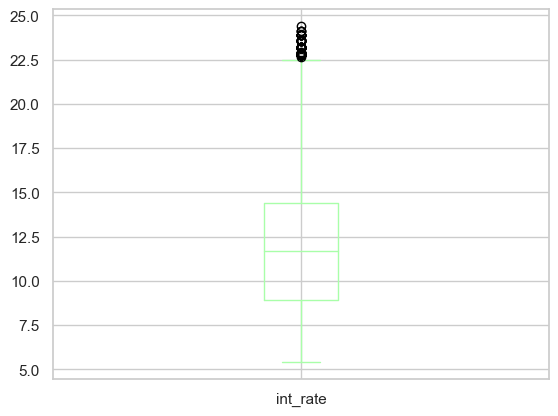

In [726]:
loan_df['int_rate'].plot.box()

##### Outliers are very evident from the picture too

##### 3.3 Checking grade and sub_grade, emp_title, home_ownership, verification_status, issue_d etc.. column

In [727]:
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [728]:
loan_df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [729]:
print(loan_df['emp_title'].value_counts().head())
print(loan_df['emp_title'].unique().shape)

emp_title
US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: count, dtype: int64
(28028,)


In [730]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [798]:
loan_df['emp_length'].isnull().sum()

1033

In [731]:
loan_df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [732]:
loan_df['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [733]:
loan_df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

##### 3.3.1 We can derive the month and year column from issue_d column for our analysis

In [734]:
issue_d = loan_df['issue_d'].str.split('-',n=1, expand=True)
loan_df['issue_month'] = issue_d[0]
loan_df['issue_year'] = pd.to_numeric(issue_d[1])

In [735]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,1,3,0,13648,83.70%,9,0.0,Dec,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,3,0,1687,9.40%,4,0.0,Dec,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Nov-01,2,2,0,2956,98.50%,10,0.0,Dec,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,1,10,0,5598,21%,37,0.0,Dec,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,3,9,0,7963,28.30%,12,0.0,Dec,11


In [736]:
loan_df.drop(columns=['issue_d'], inplace=True)

In [737]:
loan_df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [738]:
loan_df['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [739]:
len(loan_df['title'].value_counts())

19297

##### 3.3.2 Could not find any specific set of classification in title, so it may not be used to extract any infomation, so dropping it

In [740]:
loan_df.drop(columns=['title'], inplace=True)

In [741]:
loan_df['addr_state'].value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [742]:
loan_df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [743]:
e_cr_line = loan_df['earliest_cr_line'].str.split('-', n=1, expand=True)
e_cr_line[1].value_counts()

1
00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: count, dtype: int64

In [744]:
e_cr_line[0].value_counts()

0
Oct    3967
Dec    3951
Nov    3811
Sep    3505
Jan    3331
Aug    3213
Jul    2967
Jun    2863
May    2825
Feb    2783
Mar    2715
Apr    2646
Name: count, dtype: int64

##### 3.3.3 The format of 'earliest_cr_line' has MMM-YY and YY-MMM and the year is a 2 digit and not Y2K format, so this needs correction

In [745]:
from datetime import datetime
today = datetime.today()
today.year

2024

In [746]:
def convert_to_days(input_str):
    input_month, input_year = input_str.split('-')
    if input_year in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        input_year, input_month = input_str.split('-')
    input_year = 2000 + int(input_year)
    if input_year > today.year:
        input_year -= 100
    earliest_cr_line = datetime.strptime(str(input_year)+'-'+input_month+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
convert_to_days("Dec-23")

96

In [747]:
loan_df['days_from_earliest_cr_line'] = loan_df['earliest_cr_line'].apply(convert_to_days)
loan_df['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9891.981647
std       2491.854695
min       5604.000000
25%       8222.000000
50%       9441.000000
75%      11053.000000
max      28554.000000
Name: days_from_earliest_cr_line, dtype: float64

In [748]:
loan_df.drop(columns=['earliest_cr_line'], inplace=True)

In [749]:
loan_df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [750]:
#converting the values to numeric by removing %
loan_df['revol_util'] = pd.Series(loan_df['revol_util']).str.replace('%', '').astype(float)
loan_df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [751]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 38577 no

In [752]:
loan_status_percent = loan_df['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

## 4.0 Univariate Analysis

#### 4.1  Understanding the distribution and ordered and unordered catagorical variables and segmented data analysis

In [753]:
# First the possible fields needs to be converted to numeric type for analysis
# Start with loan_status assign 1 for defaulted loans and 0 for paid off ones

loan_df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

In [754]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [755]:
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [756]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 38577 no

In [757]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,3,0,13648,83.7,9,0.0,Dec,11,14309,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,3,0,1687,9.4,4,0.0,Dec,11,9106,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2,0,2956,98.5,10,0.0,Dec,11,8161,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10,0,5598,21.0,37,0.0,Dec,11,10261,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,9,0,7963,28.3,12,0.0,Dec,11,7065,0


In [758]:
loan_df.drop(columns = ['loan_status'], inplace=True)

In [759]:
loan_df['term'].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [760]:
loan_df['term_months'] = loan_df['term'].apply(lambda x: 36 if x==' 36 months' else 60)


In [761]:
loan_df.drop(columns = ['term'], inplace=True)

In [762]:
loan_df['term_months'].unique()

array([36, 60], dtype=int64)

In [763]:
print(loan_df['grade'])
print(loan_df['sub_grade'])

0        B
1        C
2        C
3        C
5        A
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 38577, dtype: object
0        B2
1        C4
2        C5
3        C1
5        A4
         ..
39712    A4
39713    C1
39714    A4
39715    A2
39716    E2
Name: sub_grade, Length: 38577, dtype: object


In [764]:
print(loan_df['grade'].unique())
print(loan_df['sub_grade'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']


In [765]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   int_rate                    38577 non-null  float64
 4   installment                 38577 non-null  float64
 5   grade                       38577 non-null  object 
 6   sub_grade                   38577 non-null  object 
 7   emp_title                   36191 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  purpose                     38577 non-null  object 
 13  addr_state                  38577 no

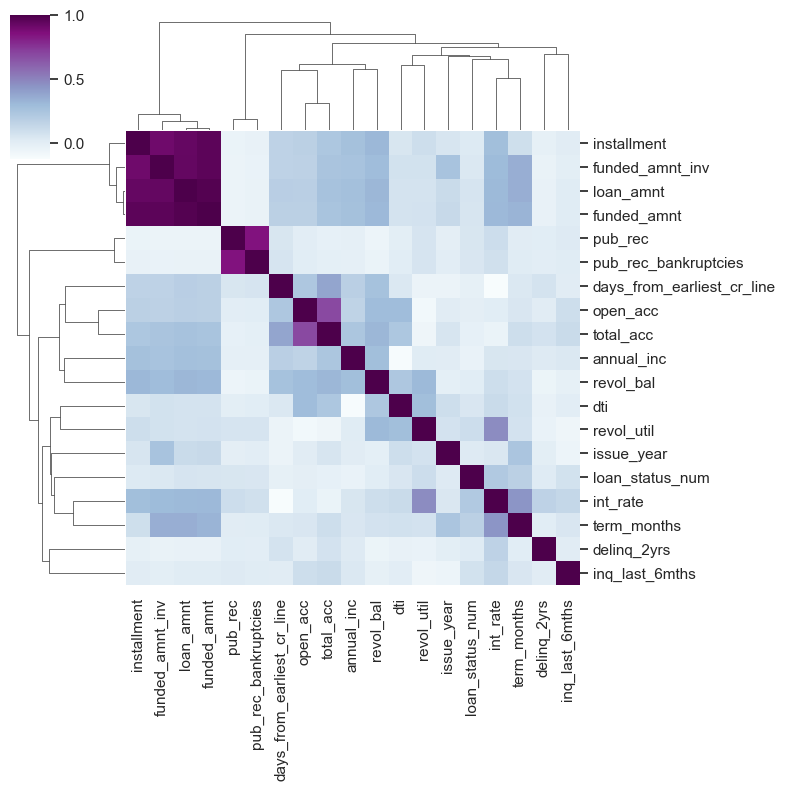

In [766]:
sns.set_style("whitegrid")
sns.clustermap(data=loan_df.corr(numeric_only=True), cmap='BuPu', figsize=(8,8))
plt.show()

#### 4.1.1 Since we know darker the value heigher the correlation, the installment, funded_amt, loan_amnt and funded_amnt_inv have high correlation
The pub_rec and pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

#### 4.2 Loan status vs Numerical continuous variables

#### 4.2.1 Lets compare the loan_status fields with all the numerical variable.

In [767]:
# Common settings/constants
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status_num'
order = ['Fully Paid','Charged Off']

# 0 'Fully Paid'  1: 'Charged Off

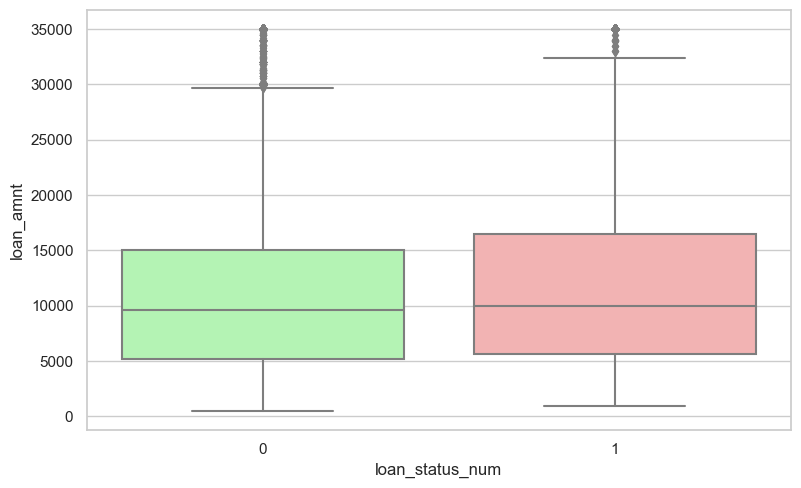

In [768]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status_num', y = 'loan_amnt', data = loan_df)
plt.show()

In [769]:
loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### 4.2.2 since there is big difference between mean and median, we can limit our data to 75%

In [770]:
loan_75 = loan_df.loc[(loan_df['loan_amnt']<=15000)]

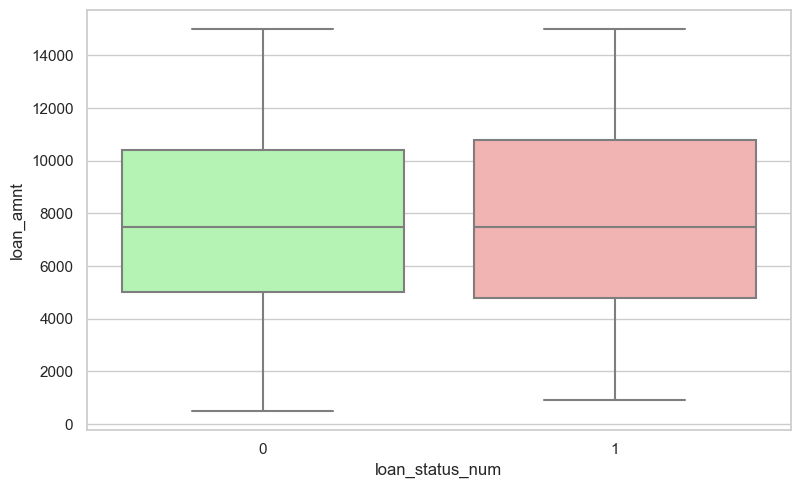

In [771]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status_num', y = 'loan_amnt', data = loan_75)
plt.show()

#### 4.2.3 The box plot shows the clean data now, so lets consider data above 75%

In [772]:
loan_df_75 = loan_df.loc[(loan_df['loan_amnt']>=15000)]
loan_df_75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,days_from_earliest_cr_line,loan_status_num,term_months
20,20250,20250,19142.16108,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3 years,RENT,...,0,17813,85.6,22,0.0,Dec,11,9622,0,60
21,21000,21000,21000.00000,12.42,701.73,B,B4,Osram Sylvania,10+ years,RENT,...,0,32135,90.3,38,0.0,Dec,11,15009,1,36
25,15000,15000,15000.00000,9.91,483.38,B,B1,Winfield Pathology Consultants,2 years,MORTGAGE,...,0,13707,93.9,31,0.0,Dec,11,8069,0,36
26,15000,15000,8725.00000,14.27,514.64,C,C2,nyc transit,9 years,RENT,...,0,5872,57.6,11,0.0,Dec,11,7462,1,36
31,31825,31825,31825.00000,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,MORTGAGE,...,0,23151,27.4,26,0.0,Dec,11,15466,0,36


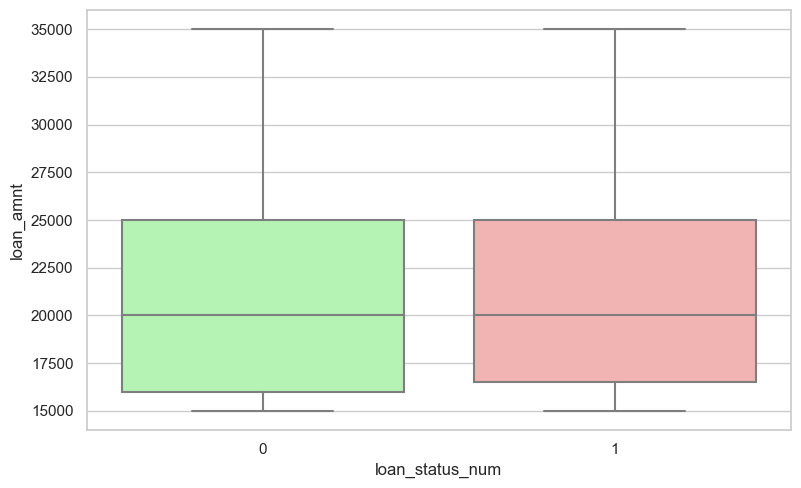

In [773]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status_num', y = 'loan_amnt', data = loan_df_75)
plt.show()

#### 4.2.4 Higher the amount will tend to "Write off"

In [774]:
def PercentileCut (*, data=loan_df, column, trailer=''):
    new_column = column + '_c'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [775]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'days_from_earliest_cr_line', 'loan_status_num', 'term_months'],
      dtype='object')

In [776]:
def Univariate_Categorical (*, data=loan_df, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                             filter=None, disp_filter = None):

    plotdata = data if filter is None else data.loc[filter]
    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan_df.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan_df.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()    

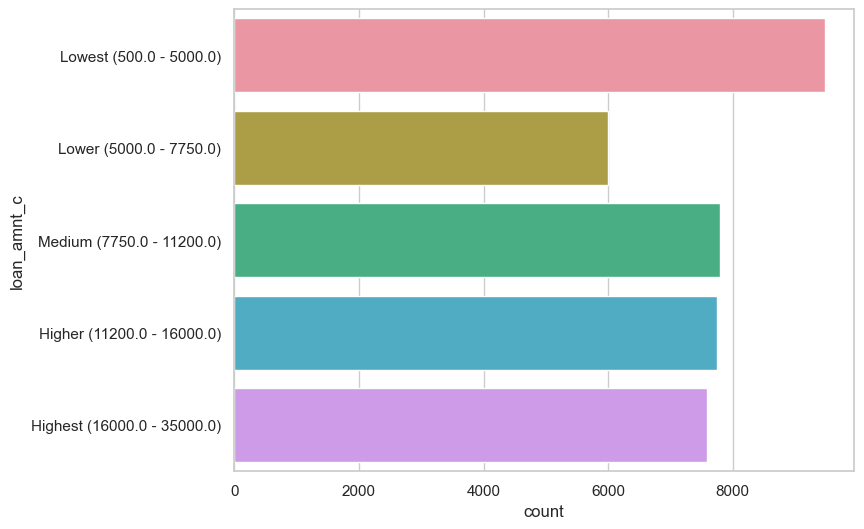

loan_amnt_c,Charged off %,Record count


In [777]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_c')

#### 4.2.5 Higher the loan amount, greater the chance of the loan getting default.

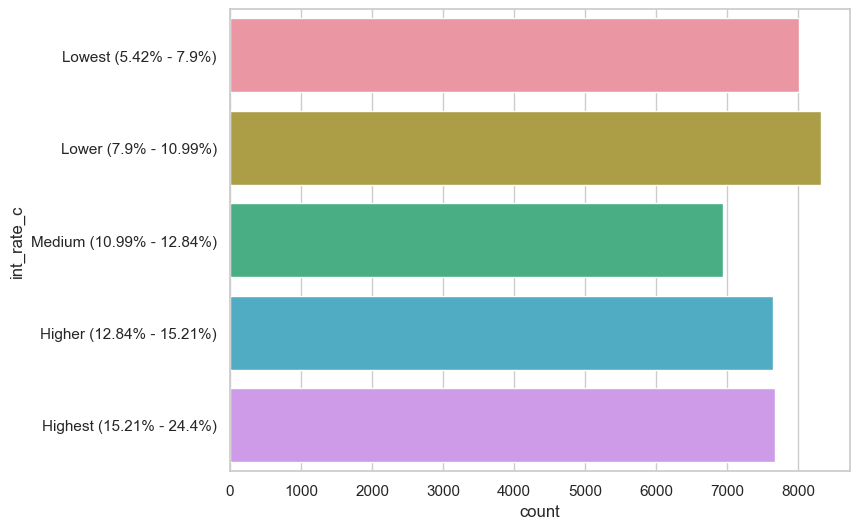

int_rate_c,Charged off %,Record count


In [778]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_c')

#### 4.2.6 Higher the interest rate leads to higher charged off%

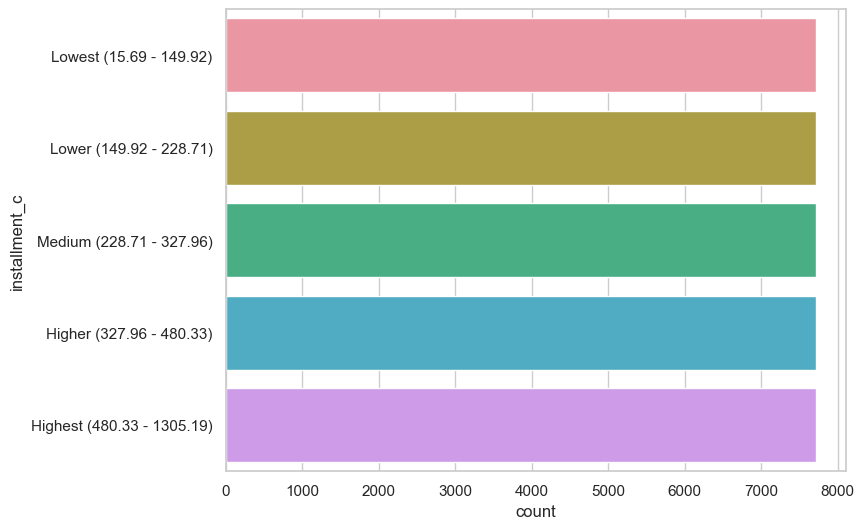

installment_c,Charged off %,Record count


In [779]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_c')

#### 4.2.7 Above data and plot shows that higher installment amounts shows higher default percentages.

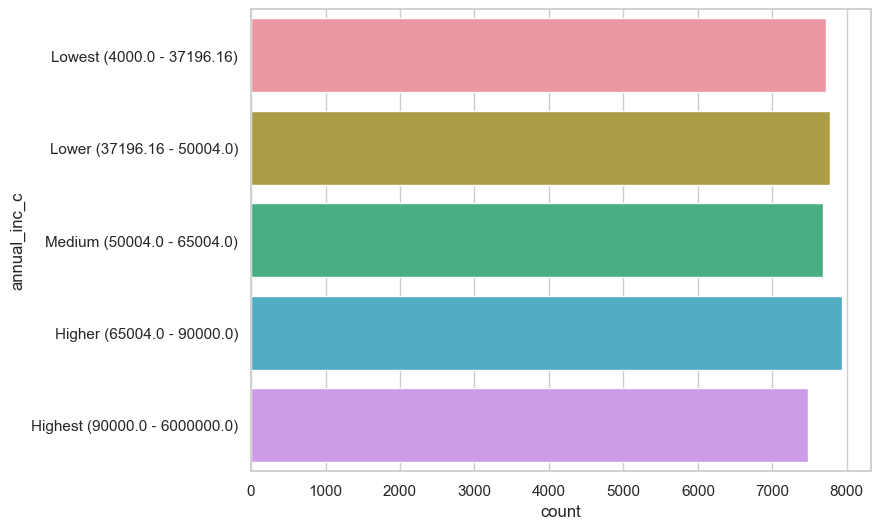

annual_inc_c,Charged off %,Record count


In [780]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_c')

#### 4.2.7 Higher the income hiegher the repayment %

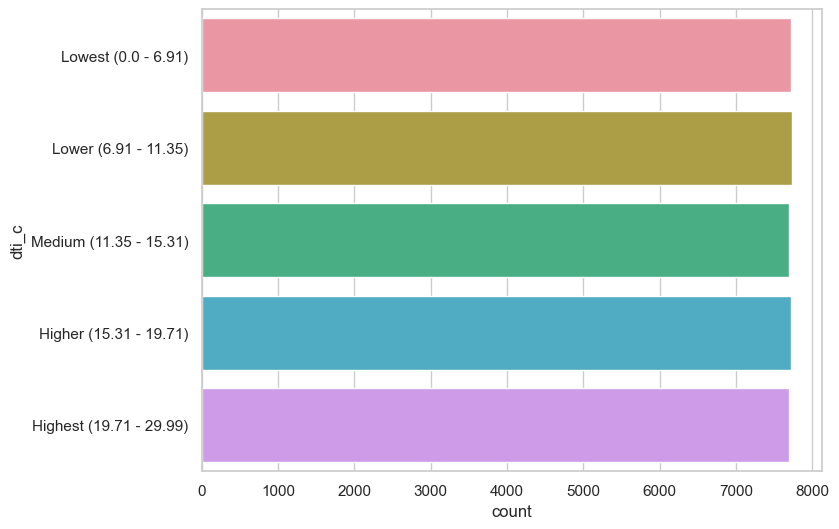

dti_c,Charged off %,Record count


In [781]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_c')

#### 4.2.8 higher DTI ( debt to income ratio) will lead to higher charged off %

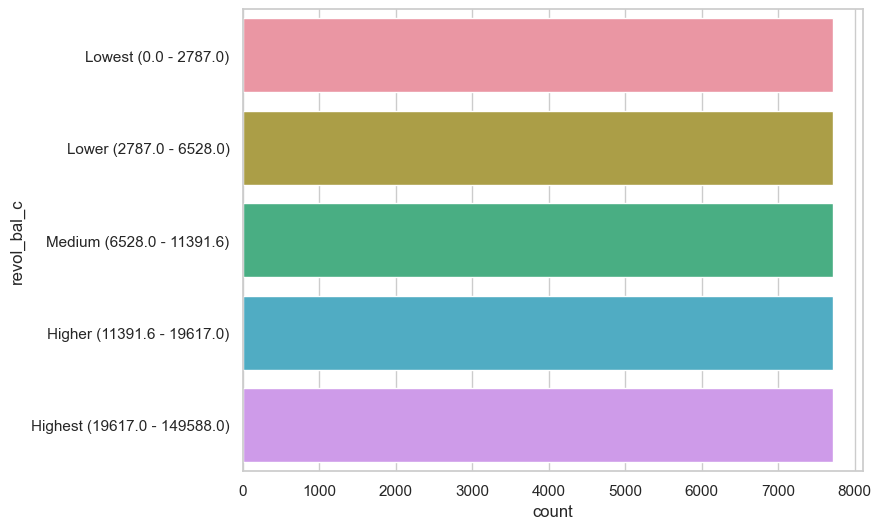

revol_bal_c,Charged off %,Record count


In [782]:
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_c')

#### 4.2.9 This shows the total credit revolving balances slightly influence the default percentage. Higher the revolving balance, bigger the chance of the loan getting defaulted.

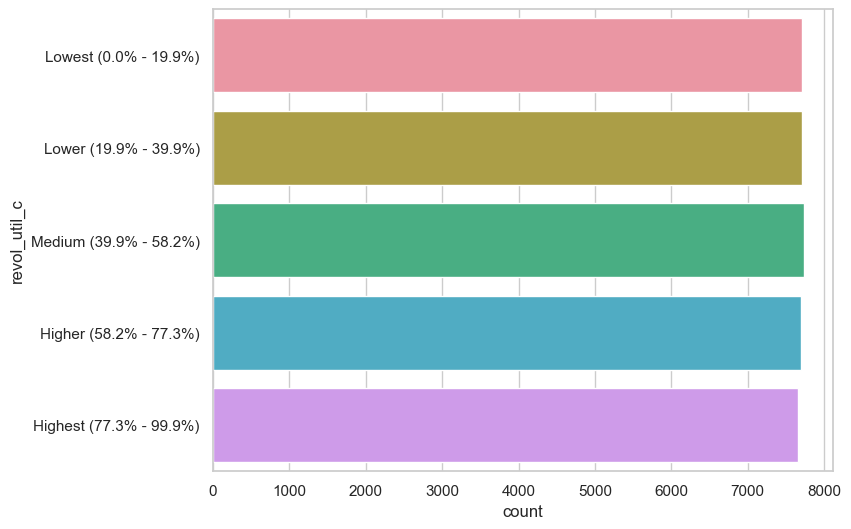

revol_util_c,Charged off %,Record count


In [783]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_c')

#### 4.2.10 This data shows that the revolving line utilization rate has a large impact to the default percentage. When this increases, the charged off percentage rises.

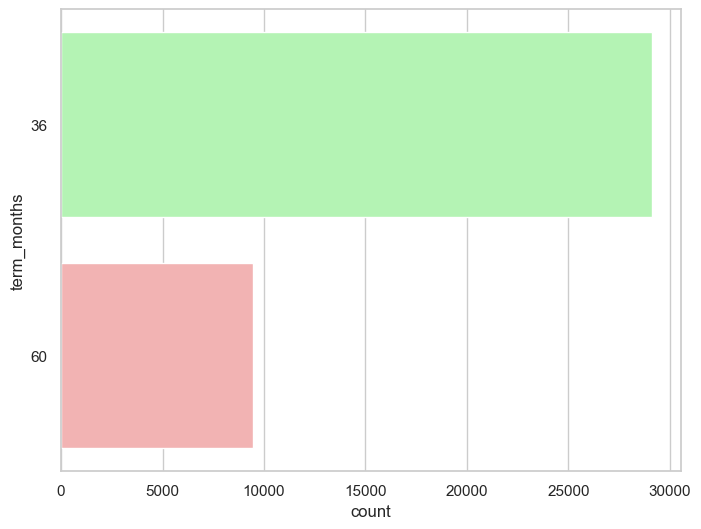

term_months,Charged off %,Record count


In [784]:
Univariate_Categorical(column='term_months')

#### 4.2.11 For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases.
Therefore, loan repayment term plays a factor in judging the default rate.

In [785]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'days_from_earliest_cr_line', 'loan_status_num', 'term_months',
       'loan_amnt_c', 'int_rate_c', 'installment_c', 'annual_inc_c', 'dti_c',
       'revol_bal_c', 'revol_util_c'],
      dtype='object')

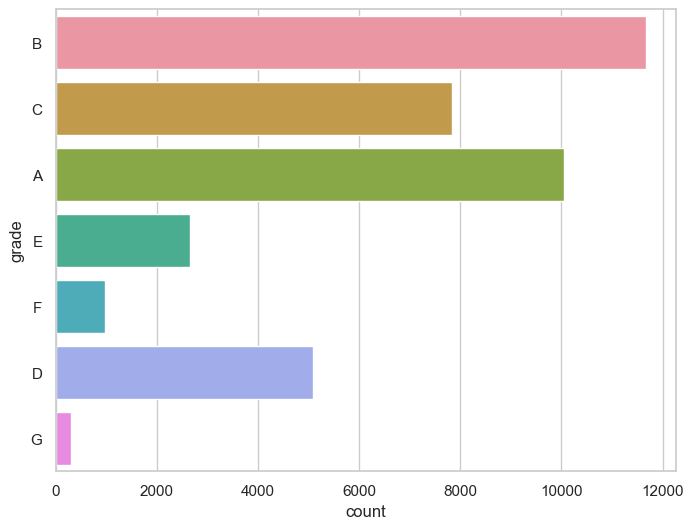

grade,Charged off %,Record count


In [786]:
Univariate_Categorical(column='grade')

#### 4.2.12 We can clearly see that loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others. grade_map = {'B':2, 'C':3, 'A':1, 'E':5, 'F':6, 'D':4, 'G':7}

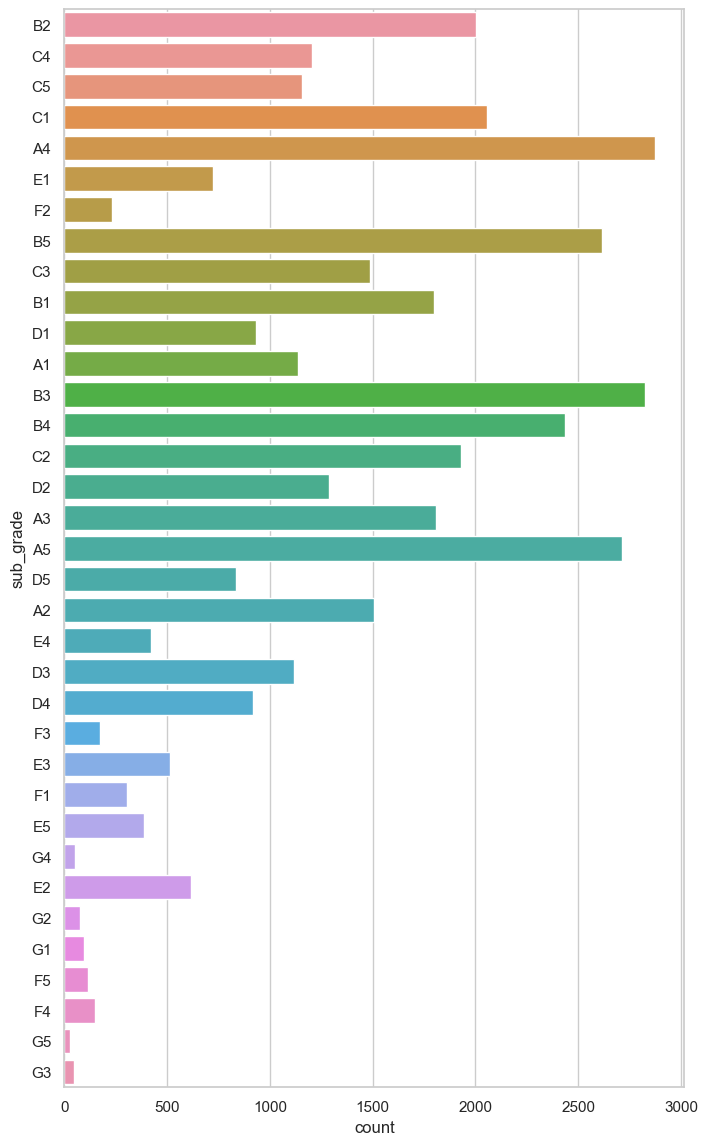

sub_grade,Charged off %,Record count


In [787]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

#### 4.2.13 The above table shows the loan sub-grade versus the default percentage. The G3 and F5 sub categories have above 40% default rate. This field is a clear indicator of the default percent.

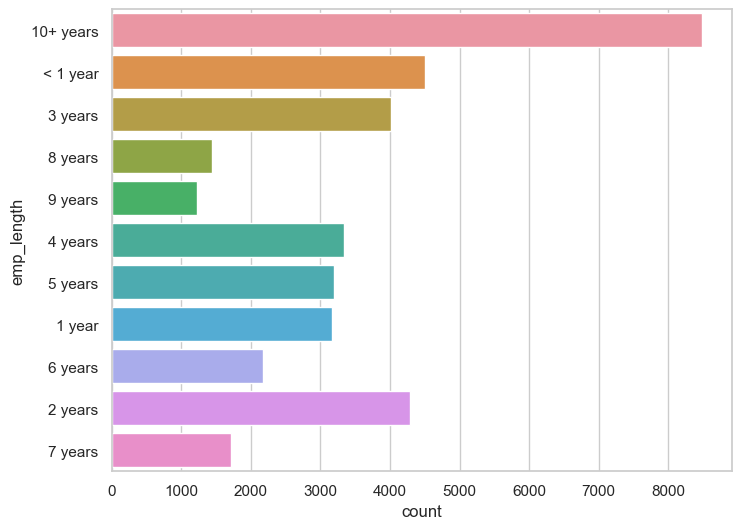

emp_length,Charged off %,Record count


In [788]:
Univariate_Categorical(column='emp_length')

#### 4.2.14 we can see having no employment will lead to Defaulted payment


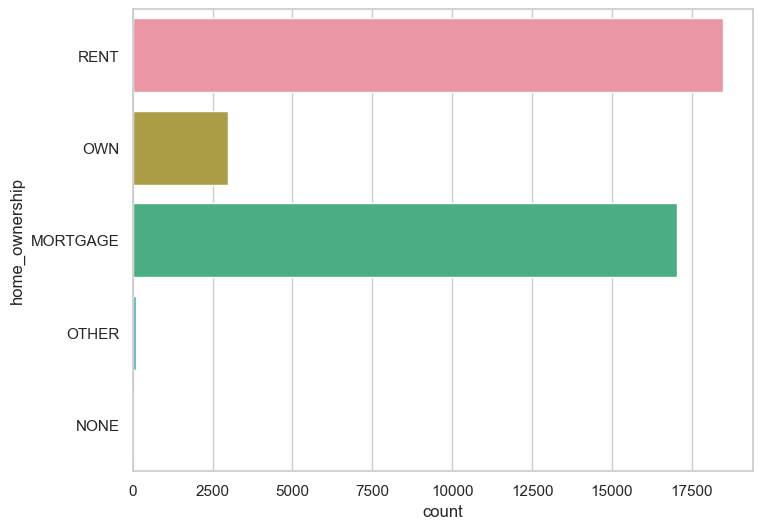

home_ownership,Charged off %,Record count


In [789]:
Univariate_Categorical(column='home_ownership')

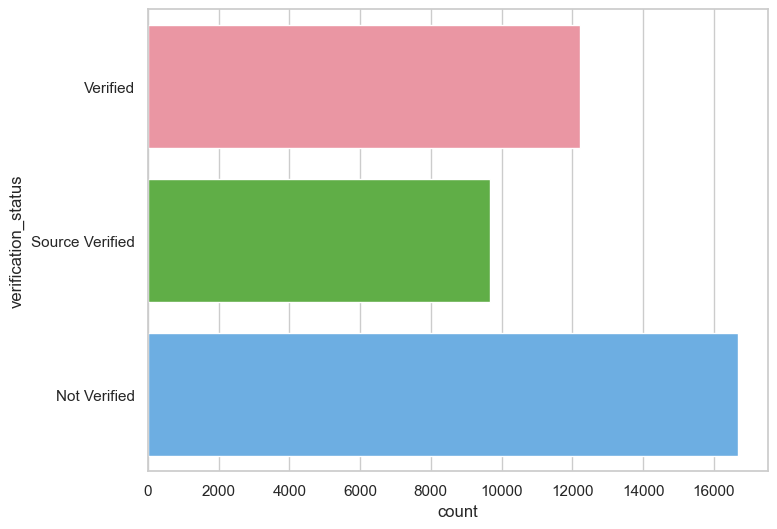

verification_status,Charged off %,Record count


In [790]:
Univariate_Categorical(column='verification_status')

#### 4.2.15 interestingly verified applicants have more defaulted % which means the verifiaction process is not correct.

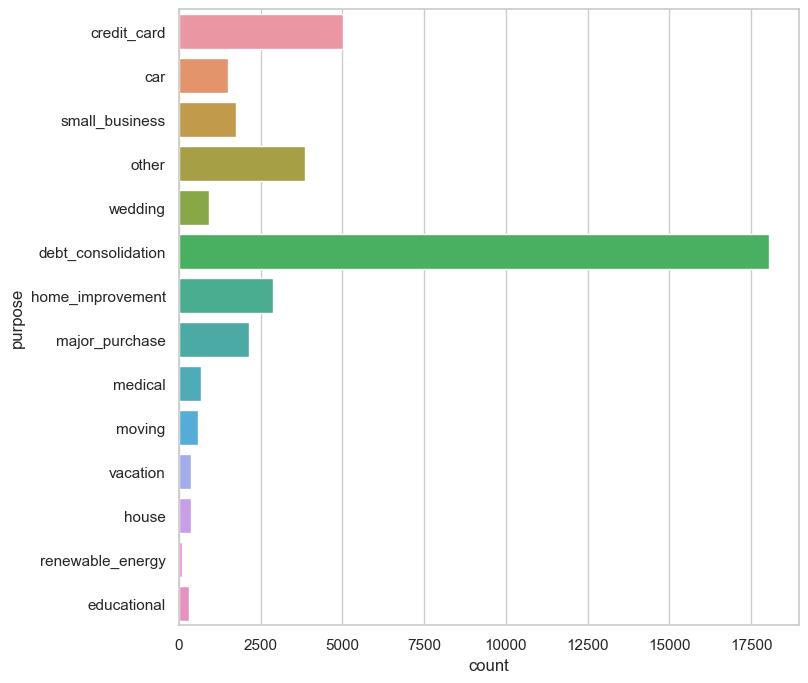

purpose,Charged off %,Record count


In [791]:
Univariate_Categorical(column='purpose', figsize=(8,8))

#### 4.2.16 From the above analysis it is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.



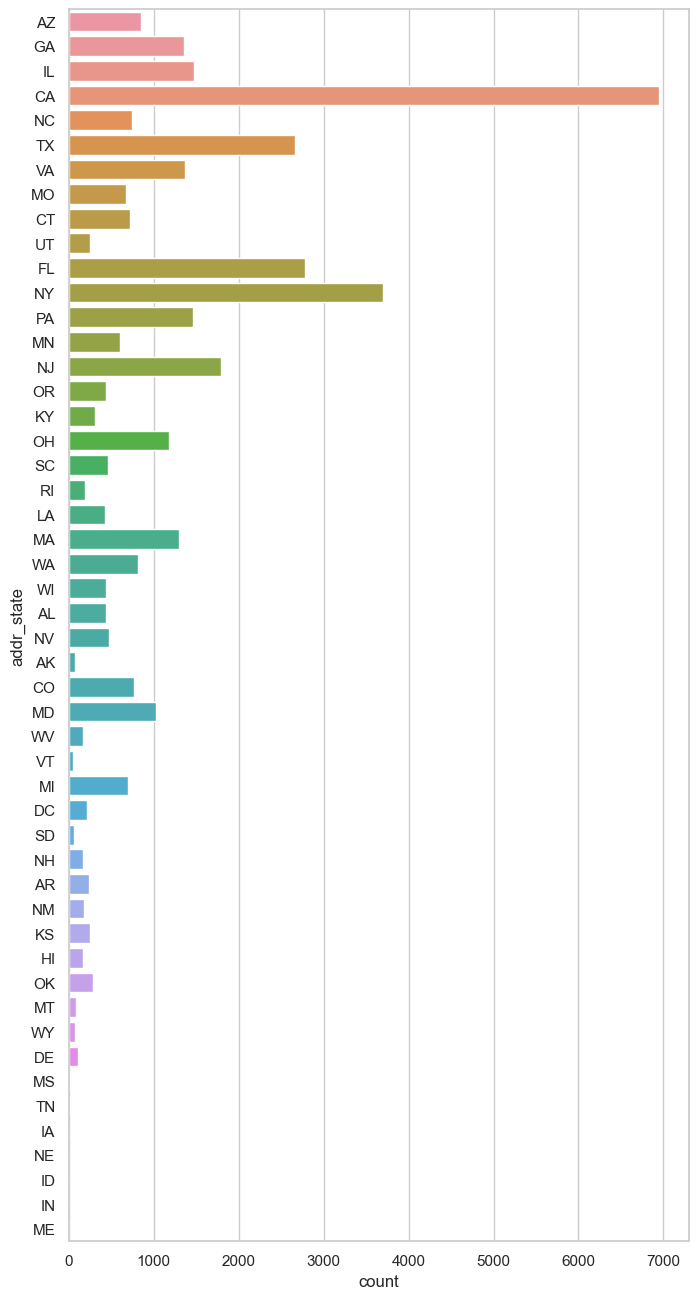

addr_state,Charged off %,Record count


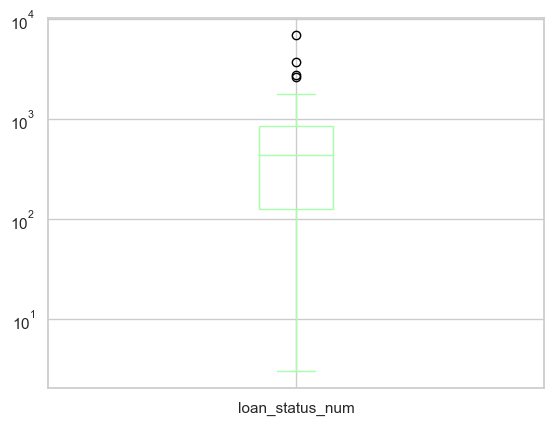

In [792]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

#### 4.2.17 From the above table we can see that the some of the risky states are NE, NV, SD, AK, FL, MO

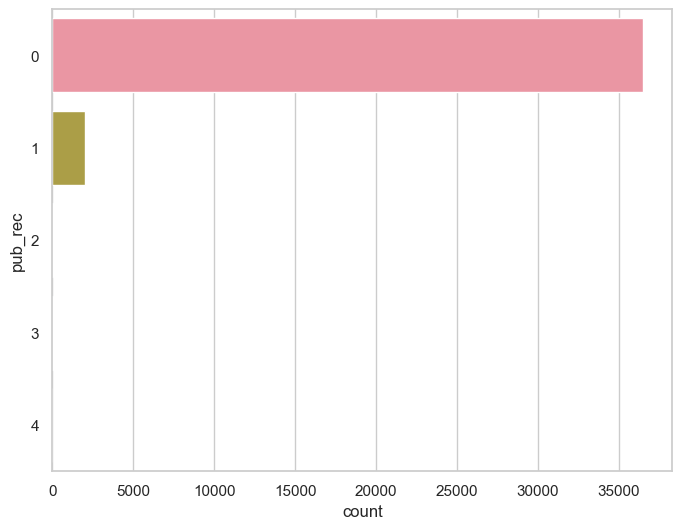

pub_rec,Charged off %,Record count


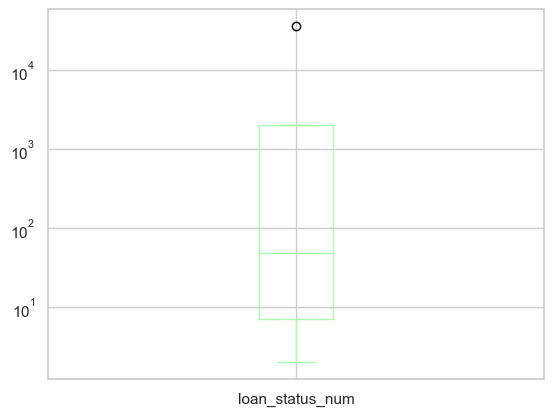

In [793]:
Univariate_Categorical(column='pub_rec', box_plot=True)

#### 4.2.18 Above data and graph crealy shows that individuals with non-zero derogatory public records have higher chances of charged off



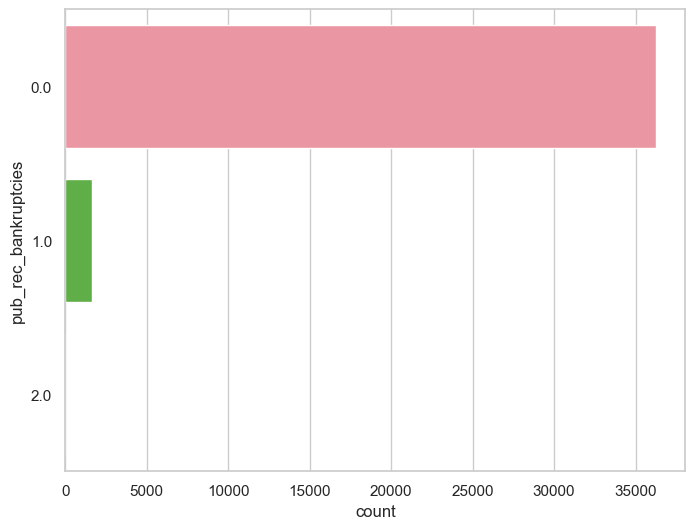

pub_rec_bankruptcies,Charged off %,Record count


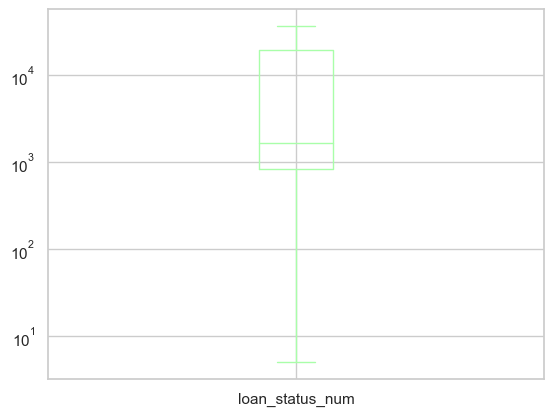

In [794]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

#### 4.2.19 Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

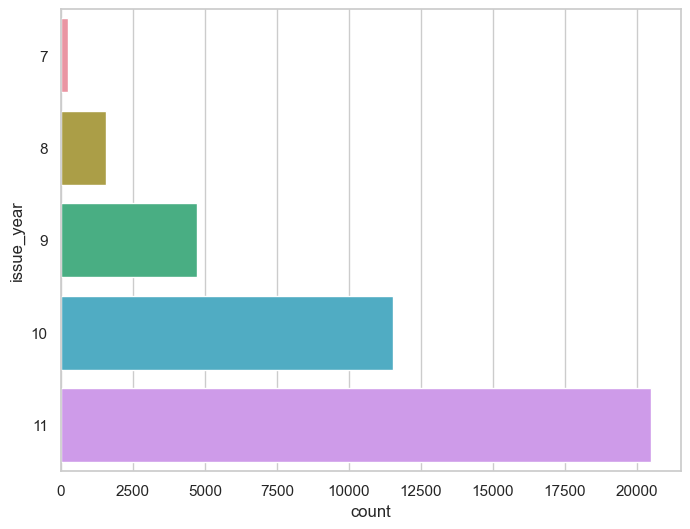

issue_year,Charged off %,Record count


In [800]:
Univariate_Categorical(column='issue_year')

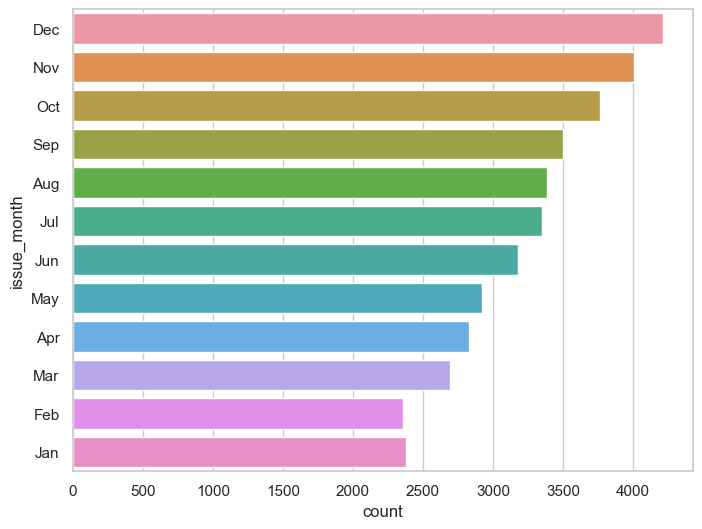

issue_month,Charged off %,Record count


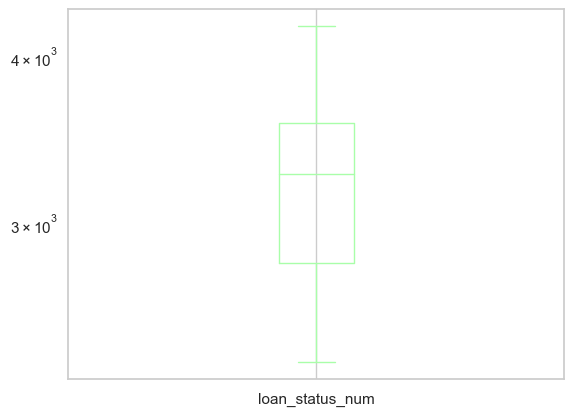

In [799]:
Univariate_Categorical(column='issue_month', box_plot=True)

#### 4.2.20 we can clearly see December is the month which has the highest number of loan applications per year and also have the biggest default ratio. May be people take loan for travel/party during Christmas and then are not able to pay back. Month of May is also another one, which is during the summer break and right before the Memorial day and Independance day breaks in US where people love to travel

#### 5.0 Bivariate Analysis
### 5.1 Common Functions

In [805]:
def Bivariate_Analysis (*, data=loan_df, x, y, title=None, figsize=(8,6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y)
    if title is not None:
        plt.title(title)
    plt.show()

In [802]:
def Bivariate_Categorical (*, data=loan_df, x, y, title=None, figsize=(8,6)):

    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

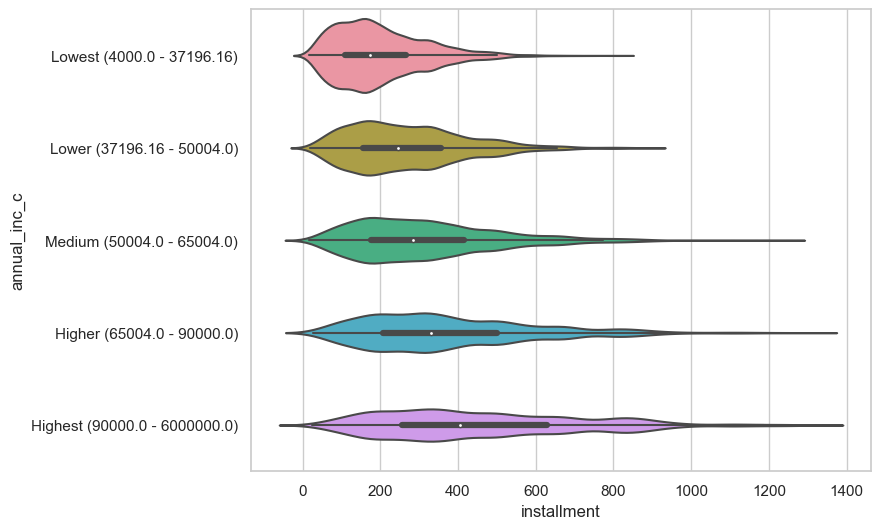

In [806]:
Bivariate_Analysis(x='installment', y='annual_inc_c')
plt.show()

#### 5.2 Above figure shows that for higher installments for any income group have more number of defaults.

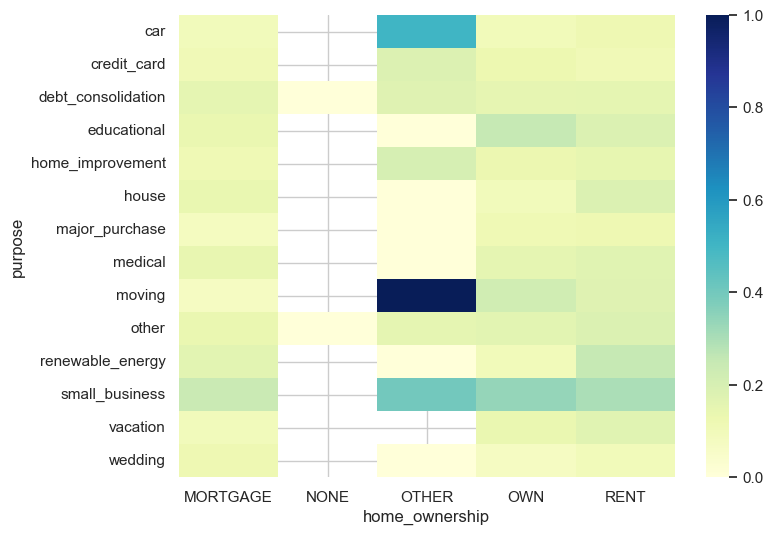

In [807]:
Bivariate_Categorical(x='home_ownership', y='purpose')

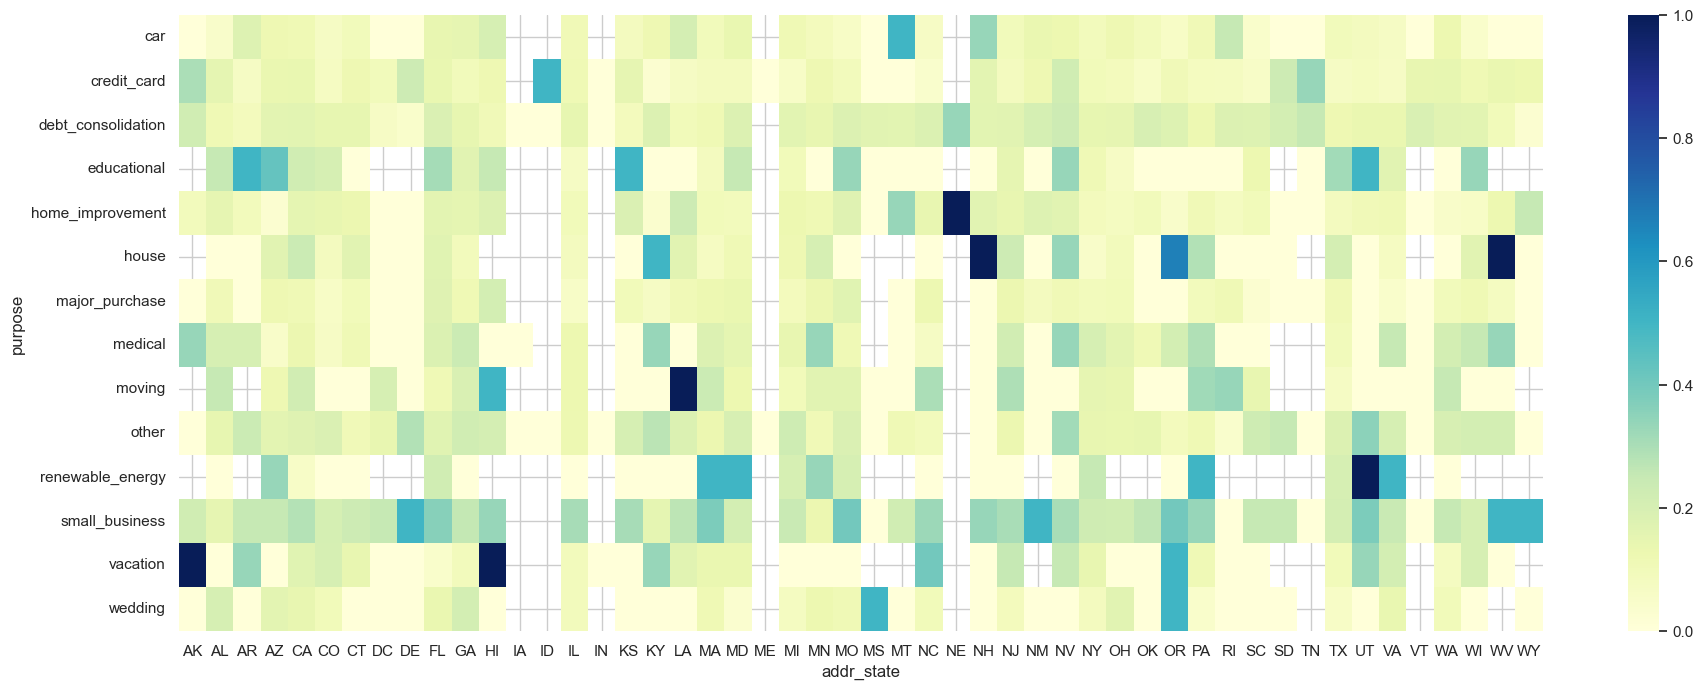

In [808]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

#### 5.3 As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. Some of the examples are below:
•vacation loans in AK, HI, OR
•education loans in AR, KS, UT
•small business loans in DE, NM, WV, wY
•wedding loans in MS, OR

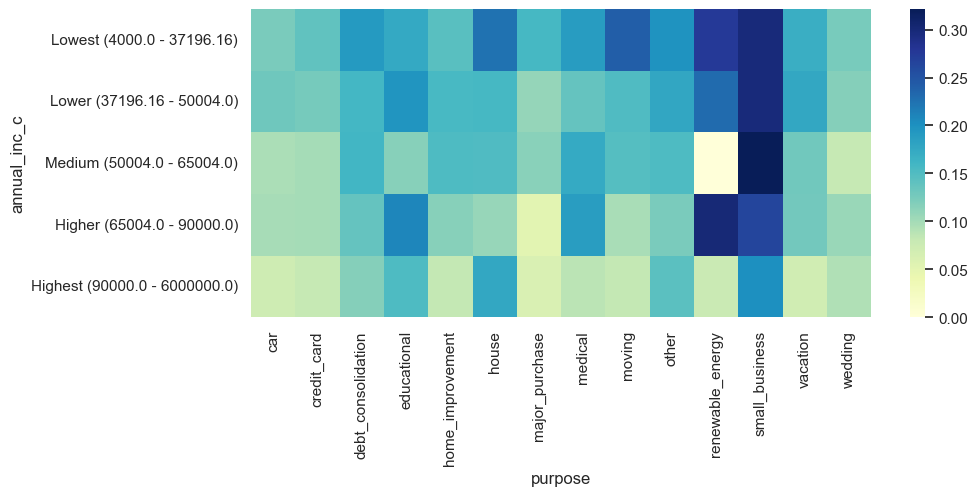

In [810]:
Bivariate_Categorical(x='purpose', y='annual_inc_c', figsize=(10,4))

#### 5.4 Plot of various income groups versus the risky purposes of loans for them. Some examples are:
•small business loans for lowest and medium income groups
•renewable energy loans for higher income group

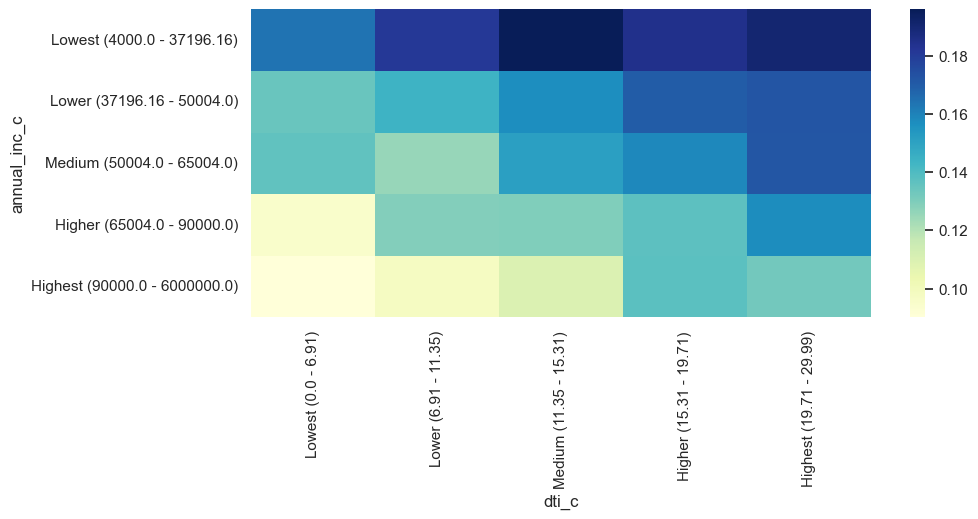

In [812]:
Bivariate_Categorical(x='dti_c', y='annual_inc_c', figsize=(10,4))

#### 5.5 Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.

#### 6.0 Conclusion
<b>Findings</b>

<b>Low Factors</b> <br>
.Higher loan amount (above 16K) <br>
•Higher installment amount (above 327) <br>
•Lower annual income (below 37K)<br> 
•Higher debt to income ratio (above 15%) <br>
•Applicant’s address state (NV, SD, AK, FL, etc.) <br>
•Loan issue month (Dec, May, Sep)<br>

<b>Medium Factors</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years)<br> 
•Loan grade & sub-grade (D to G) <br>
•Missing employment record<br> 
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2)<br>

<b>Overall</b> <br>
•High loan amount & interest rate for lower income group <br>
•High installment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>